In [1]:
import pandas as pd # For DataFrames, Series, and reading csv data in.
import seaborn as sns # Graphing, built ontop of MatPlot for ease-of-use and nicer diagrams.
import matplotlib.pyplot as plt # MatPlotLib for graphing data visually. Seaborn more likely to be used.
import numpy as np # For manipulating arrays and changing data into correct formats for certain libraries
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler  # For Normalization

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [5]:
dfo= pd.read_csv('Dataset1.csv')
df=dfo.copy()

In [6]:
df.shape

(385972, 22)

In [7]:
#df = df.sample(frac=1).reset_index(drop=True)
df = df.reset_index(drop=True)
df.sort_values(by='timestamp', inplace=True)

        # flow_dataset.iloc[:, 2] = flow_dataset.iloc[:, 2].str.replace('.', '')
        # flow_dataset.iloc[:, 3] = flow_dataset.iloc[:, 3].str.replace('.', '')
        # flow_dataset.iloc[:, 5] = flow_dataset.iloc[:, 5].str.replace('.', '')


In [8]:
import seaborn
df.corr() #for correlation

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
timestamp,1.000000,0.030168,0.021241,0.033743,0.041765,-0.019228,-0.007497,0.075588,-0.059670,-0.078788,...,-0.012456,0.004108,NaN,-0.745432,-0.337135,-0.392951,-0.185387,-0.208520,-0.039711,0.011783
datapath_id,0.030168,1.000000,-0.077958,-0.037478,-0.052558,0.141112,0.089057,-0.183538,0.176222,0.193832,...,-0.032076,-0.047395,NaN,-0.020559,0.029473,-0.010991,-0.004813,0.012589,0.002914,-0.142566
flow_id,0.021241,-0.077958,1.000000,0.583619,0.123399,-0.154868,-0.072656,0.203814,-0.199393,-0.224149,...,0.026423,0.043034,NaN,-0.016123,-0.039415,-0.008667,-0.004386,-0.021536,-0.006880,0.115028
ip_src,0.033743,-0.037478,0.583619,1.000000,-0.032455,-0.052366,-0.126351,0.093695,-0.109423,-0.054608,...,0.043341,0.072664,NaN,-0.027952,-0.068408,-0.015028,-0.007607,-0.037393,-0.011938,0.199421
tp_src,0.041765,-0.052558,0.123399,-0.032455,1.000000,-0.614365,-0.108859,0.485376,-0.143852,-0.443360,...,-0.004373,-0.040218,NaN,-0.006304,0.210636,-0.001882,0.000777,0.112819,0.038898,-0.281733
ip_dst,-0.019228,0.141112,-0.154868,-0.052366,-0.614365,1.000000,0.178738,-0.895881,0.478408,0.743173,...,-0.058717,-0.079898,NaN,-0.003632,-0.093183,-0.003086,-0.002434,-0.049927,-0.017440,-0.063098
tp_dst,-0.007497,0.089057,-0.072656,-0.126351,-0.108859,0.178738,1.000000,-0.138462,0.064055,-0.098054,...,-0.109156,-0.169237,NaN,-0.004768,0.025026,-0.002423,-0.000751,0.013044,0.004866,-0.633693
ip_proto,0.075588,-0.183538,0.203814,0.093695,0.485376,-0.895881,-0.138462,1.000000,-0.703018,-0.862548,...,0.103679,0.166039,NaN,-0.034471,0.003909,-0.017460,-0.007598,0.012602,-0.000418,0.244729
icmp_code,-0.059670,0.176222,-0.199393,-0.109423,-0.143852,0.478408,0.064055,-0.703018,1.000000,0.697671,...,-0.074881,-0.123738,NaN,0.051082,0.188114,0.026373,0.014825,0.089349,0.033362,-0.375859
icmp_type,-0.078788,0.193832,-0.224149,-0.054608,-0.443360,0.743173,-0.098054,-0.862548,0.697671,1.000000,...,-0.021589,-0.049906,NaN,0.058342,0.059549,0.030808,0.014798,0.032996,0.006242,-0.029468


In [9]:
'''
import datetime

t_start=df.iloc[0,0]
t_benign=df.iloc[50358,0] #50358 is the last benign row
t_ddos=df.iloc[385971,0] #50359 is the first ddos row,385971 is the last ddos row

d_start=datetime.datetime.fromtimestamp(t_start)
d_benign=datetime.datetime.fromtimestamp(t_benign)
d_ddos=datetime.datetime.fromtimestamp(t_ddos)

print("benign=",(d_benign-d_start))
print("ddos=",(d_ddos-d_benign))
print("total=",(d_ddos-d_start))
'''
'''
timet=df[df['label']==0]['timestamp'][50358] - df[df['label']==0]['timestamp'][0]
print(timet/60)
#df[df['label']==0]
'''

"\ntimet=df[df['label']==0]['timestamp'][50358] - df[df['label']==0]['timestamp'][0]\nprint(timet/60)\n#df[df['label']==0]\n"

In [10]:
df[df['label']==1]

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
384911,1.705336e+09,2,1000401000401,10004,0,10004,0,1,0,8,...,20,100,0,404707,65562534,0.000000,0.000000,0.000000e+00,0.000000,1
384912,1.705336e+09,1,1000401000401,10004,0,10004,0,1,0,8,...,16,96,0,411823,66715326,102955.750000,0.000551,1.667883e+07,0.089192,1
384913,1.705336e+09,4,100011010001101,100011,0,100011,0,1,0,8,...,15,95,0,542439,87875118,108487.800000,0.001930,1.757502e+07,0.312723,1
384914,1.705336e+09,2,1000401000401,10004,0,10004,0,1,0,8,...,11,91,0,743180,120395160,82575.555556,0.000797,1.337724e+07,0.129041,1
384915,1.705336e+09,1,1000401000401,10004,0,10004,0,1,0,8,...,6,86,0,750297,121548114,53592.642857,0.001010,8.682008e+06,0.163591,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184734,1.705824e+09,3,174710511010357100021806,1747105110,10357,100021,80,6,-1,-1,...,6,86,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,1
184732,1.705824e+09,3,17422282410614100021806,174222824,10614,100021,80,6,-1,-1,...,6,86,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,1
184731,1.705824e+09,3,17416614416010571100021806,174166144160,10571,100021,80,6,-1,-1,...,6,86,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,1
184729,1.705824e+09,3,1723218818310637100021806,17232188183,10637,100021,80,6,-1,-1,...,6,86,0,0,0,0.000000,0.000000,0.000000e+00,0.000000,1


In [11]:
feat={'timestamp','datapath_id','flow_id','ip_src','tp_src','ip_dst','tp_dst','icmp_code'} #dropped additional icmp_code retained icmp_type, refer to 2 links and verify reason for dropping from Arjun
flow_datasetn=df.drop(feat,axis=1)

In [12]:
flow_datasetn.head()

,ip_proto,icmp_type,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
384911,1,8,0,5000000,20,100,0,404707,65562534,0.000000,0.000000,0.000000e+00,0.000000,1
384912,1,8,4,748000000,16,96,0,411823,66715326,102955.750000,0.000551,1.667883e+07,0.089192,1
384913,1,8,5,281000000,15,95,0,542439,87875118,108487.800000,0.001930,1.757502e+07,0.312723,1
384914,1,8,9,933000000,11,91,0,743180,120395160,82575.555556,0.000797,1.337724e+07,0.129041,1
384915,1,8,14,743000000,6,86,0,750297,121548114,53592.642857,0.001010,8.682008e+06,0.163591,1


In [13]:
df.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
384911,1.705336e+09,2,1000401000401,10004,0,10004,0,1,0,8,...,20,100,0,404707,65562534,0.000000,0.000000,0.000000e+00,0.000000,1
384912,1.705336e+09,1,1000401000401,10004,0,10004,0,1,0,8,...,16,96,0,411823,66715326,102955.750000,0.000551,1.667883e+07,0.089192,1
384913,1.705336e+09,4,100011010001101,100011,0,100011,0,1,0,8,...,15,95,0,542439,87875118,108487.800000,0.001930,1.757502e+07,0.312723,1
384914,1.705336e+09,2,1000401000401,10004,0,10004,0,1,0,8,...,11,91,0,743180,120395160,82575.555556,0.000797,1.337724e+07,0.129041,1
384915,1.705336e+09,1,1000401000401,10004,0,10004,0,1,0,8,...,6,86,0,750297,121548114,53592.642857,0.001010,8.682008e+06,0.163591,1


In [14]:
print(df.shape)
print(flow_datasetn.shape)

(385972, 22)
(385972, 14)


In [15]:
# flow_datasetn.iloc[:, 0] = flow_datasetn.iloc[:, 0].str.replace('.', '')

#flow_datasetn.iloc[:, 1] = flow_datasetn.iloc[:, 1].str.replace('.', '')

'''
X_flow=flow_datasetn.drop('label',axis=1)
y_flow=flow_datasetn['label']
X_flow = X_flow.astype('float64')
'''
#X_flow = flow_datasetn.iloc[:, :-1].values
#y_flow = flow_datasetn.iloc[:, -1].values


X_flow = flow_datasetn.iloc[:, :-1].values
X_flow = X_flow.astype('float64')
y_flow = flow_datasetn.iloc[:, -1].values


In [16]:
X_flow

array([[ 1.00000000e+00,  8.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.00000000e+00,  4.00000000e+00, ...,
         5.50565508e-04,  1.66788315e+07,  8.91916123e-02],
       [ 1.00000000e+00,  8.00000000e+00,  5.00000000e+00, ...,
         1.93038790e-03,  1.75750236e+07,  3.12722840e-01],
       ...,
       [ 6.00000000e+00, -1.00000000e+00,  1.40000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.00000000e+00, -1.00000000e+00,  1.40000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.00000000e+00, -1.00000000e+00,  1.40000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
y_flow

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
rus = RandomUnderSampler(random_state=42)


X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.2,  random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_flow_train, y_flow_train) #to balance class distribution for imbalanced dataset,done in train split only

#sc = StandardScaler()
#X_train_rus = sc.fit_transform(X_train_rus)  #Must have equal len keys and value when setting with a ndarray
#X_flow_test = sc.transform(X_flow_test)



In [19]:
sc=StandardScaler()
X_train_rus = sc.fit_transform(X_train_rus)
X_flow_test = sc.transform(X_flow_test)

In [20]:
X_flow_test

array([[ 1.27812282, -0.82142458, -1.05416055, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355,  0.24724459, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [ 1.27812282, -0.82142458, -0.81014709, ..., -0.03237325,
        -0.14181286, -0.04128978],
       ...,
       [ 1.27812282, -0.82142458,  0.00323113, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355, -0.64747145, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355, -1.05416055, ..., -0.03237325,
        -0.14181286, -0.04128978]])

In [21]:
#Random Forest
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", class_weight='balanced',random_state=0)
rf = classifier.fit(X_train_rus, y_train_rus)

In [22]:
y_test_rf = rf.predict(X_flow_test)

In [23]:
y_train_rf= rf.predict(X_train_rus)

In [24]:
X_flow_test

array([[ 1.27812282, -0.82142458, -1.05416055, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355,  0.24724459, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [ 1.27812282, -0.82142458, -0.81014709, ..., -0.03237325,
        -0.14181286, -0.04128978],
       ...,
       [ 1.27812282, -0.82142458,  0.00323113, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355, -0.64747145, ..., -0.03237325,
        -0.14181286, -0.04128978],
       [-1.01328131,  1.39577355, -1.05416055, ..., -0.03237325,
        -0.14181286, -0.04128978]])

In [25]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
test_accuracy = accuracy_score(y_flow_test, y_test_rf)
train_accuracy = accuracy_score(y_train_rus, y_train_rf)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 98.65137226604294
Test Accuracy: 97.00239652827256


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_flow_test, y_test_rf ))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     10170
           1       0.99      0.97      0.98     67025

    accuracy                           0.97     77195
   macro avg       0.92      0.96      0.94     77195
weighted avg       0.97      0.97      0.97     77195



In [27]:
rf.classes_

array([0, 1])

[[ 9708   462]
 [ 1852 65173]]


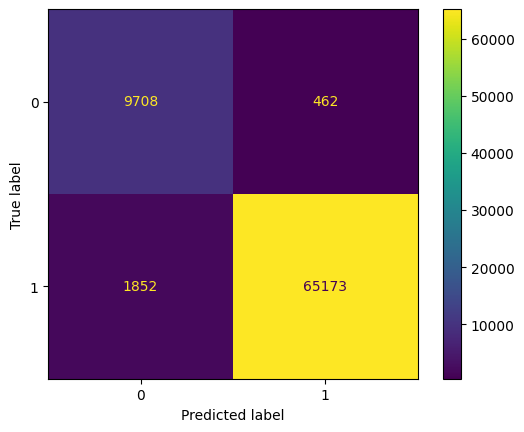

In [28]:
cm_rf=confusion_matrix(y_flow_test, y_test_rf,labels=rf.classes_)
print(cm_rf)
cm = confusion_matrix(y_flow_test, y_test_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()


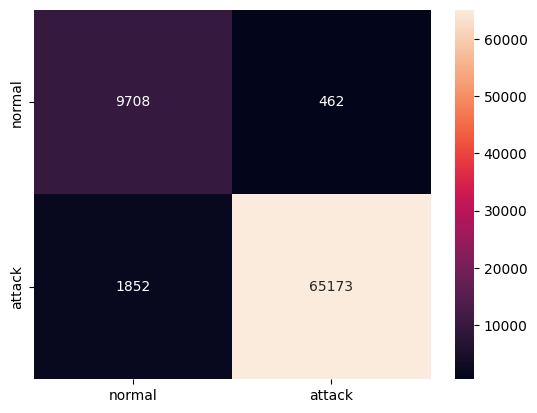

In [29]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = y_test_rf.flatten().round()
predictn = predictn.tolist()
Y_testn = y_flow_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fn+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fp+=1
      
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ['normal','attack'],columns = ['normal','attack'])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")   


In [30]:
##################XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train_rus, y_train_rus)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [31]:
y_test_xgb = xgb_model.predict(X_flow_test)


In [32]:
y_train_xgb = xgb_model.predict(X_train_rus)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Calculate accuracy
test_accuracy = accuracy_score(y_flow_test, y_test_xgb )
train_accuracy = accuracy_score(y_train_rus, y_train_xgb)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 97.30025628903431
Test Accuracy: 98.58669602953559


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_flow_test,  y_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10170
           1       0.99      0.99      0.99     67025

    accuracy                           0.99     77195
   macro avg       0.97      0.97      0.97     77195
weighted avg       0.99      0.99      0.99     77195



[[ 9640   530]
 [  561 66464]]

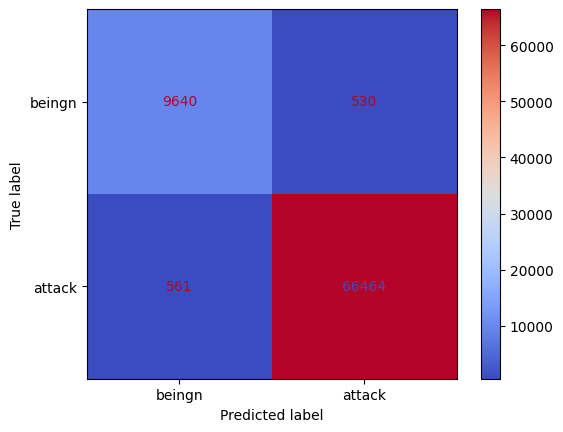

In [35]:
cm_xgb=confusion_matrix(y_flow_test, y_test_xgb,labels=xgb_model.classes_)
print(cm_xgb)
cm_disp_xgb=ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=['beingn','attack'])
cm_disp_xgb.plot(cmap='coolwarm')


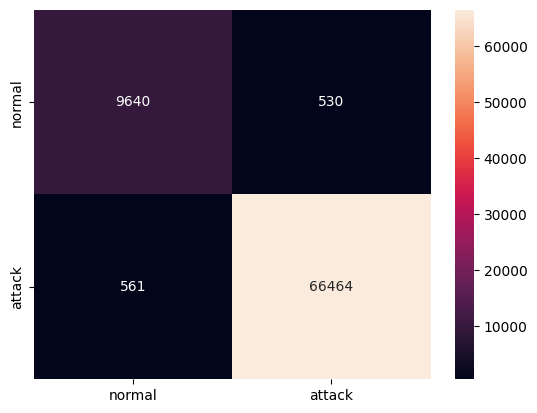

In [36]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = y_test_xgb.flatten().round()
predictn = predictn.tolist()
Y_testn = y_flow_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fn+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fp+=1
      
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ['normal','attack'],columns = ['normal','attack'])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")   


In [37]:
######Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train_rus, y_train_rus)


GaussianNB()

In [38]:
y_test_nb = nb.predict(X_flow_test)

In [39]:
y_train_nb = nb.predict(X_train_rus)

In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
test_accuracy = accuracy_score(y_flow_test, y_test_nb)
train_accuracy = accuracy_score(y_train_rus, y_train_nb)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 67.76729950981611
Test Accuracy: 91.53960748753157


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_flow_test,  y_test_nb))


              precision    recall  f1-score   support

           0       0.99      0.36      0.53     10170
           1       0.91      1.00      0.95     67025

    accuracy                           0.92     77195
   macro avg       0.95      0.68      0.74     77195
weighted avg       0.92      0.92      0.90     77195



[[ 3674  6496]
 [   35 66990]]


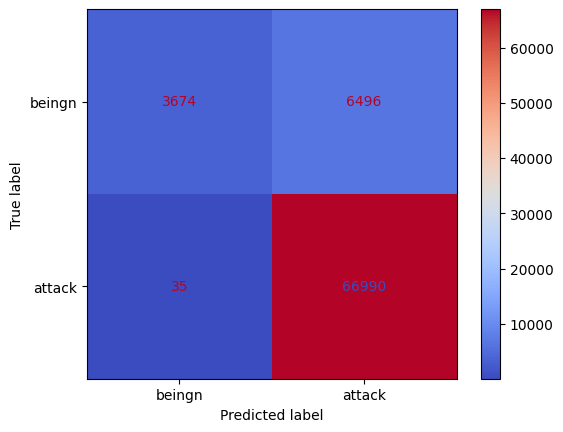

In [42]:
cm_nb=confusion_matrix(y_flow_test, y_test_nb,labels=nb.classes_)
print(cm_nb)
cm_disp_nb=ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=['beingn','attack'])
cm_disp_nb.plot(cmap='coolwarm')

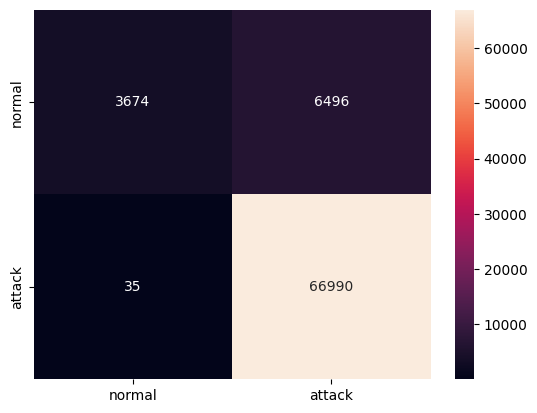

In [43]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = y_test_nb.flatten().round()
predictn = predictn.tolist()
Y_testn = y_flow_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fn+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fp+=1
      
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ['normal','attack'],columns = ['normal','attack'])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")   


In [44]:
###########KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_rus,y_train_rus)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Calculate accuracy of KNN
y_test_knn = knn.predict(X_flow_test)

In [46]:
y_train_knn = knn.predict(X_train_rus)

In [47]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_flow_test, y_test_knn)
train_accuracy = accuracy_score(y_train_rus, y_train_knn)

print("Training Accuracy:", train_accuracy * 100)
print("Test Accuracy:", test_accuracy * 100)

Training Accuracy: 94.51715643584066
Test Accuracy: 93.32728803678995


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_flow_test, y_test_knn))


              precision    recall  f1-score   support

           0       0.70      0.87      0.78     10170
           1       0.98      0.94      0.96     67025

    accuracy                           0.93     77195
   macro avg       0.84      0.91      0.87     77195
weighted avg       0.94      0.93      0.94     77195



[[ 8883  1287]
 [ 3864 63161]]


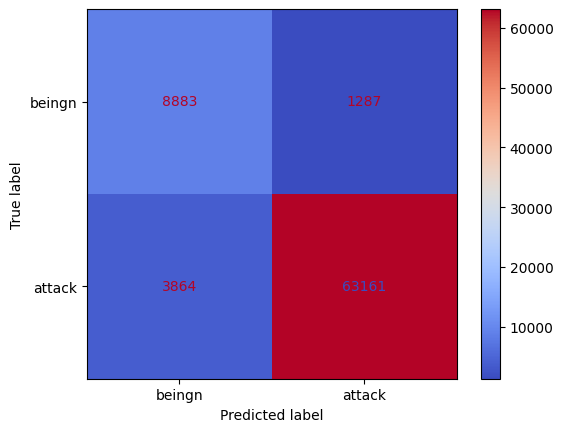

In [49]:
cm_knn=confusion_matrix(y_flow_test, y_test_knn,labels=knn.classes_)
print(cm_knn)
cm_disp_knn=ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=['beingn','attack'])
cm_disp_knn.plot(cmap='coolwarm')

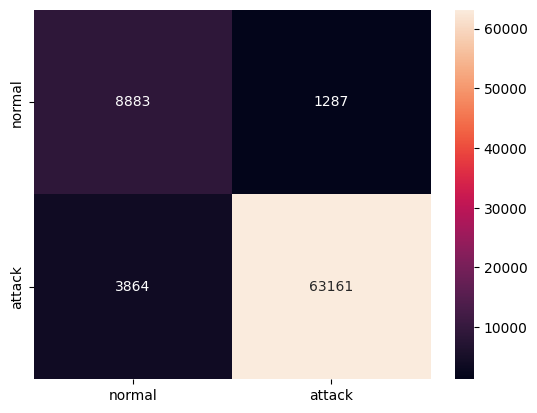

In [50]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = y_test_knn.flatten().round()
predictn = predictn.tolist()
Y_testn = y_flow_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fn+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fp+=1
      
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ['normal','attack'],columns = ['normal','attack'])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")   


In [51]:
X_train_rus.shape


(80378, 13)

In [52]:
###################################Neural Network
import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

sc=StandardScaler()
X_train_rus = sc.fit_transform(X_train_rus)
X_flow_test = sc.transform(X_flow_test)

nn_model = Sequential([
    Dense(units=13, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')  #output layer  
])
nn_model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train_rus, y_train_rus, epochs=50, batch_size=10000, validation_data=(X_flow_test, y_flow_test))

2024-01-29 18:58:52.854654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 18:58:53.694379: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 18:58:53.694532: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 18:58:53.698800: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 18:58:54.097309: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 18:58:54.099976: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/50
9/9 [==============================] - 1s 37ms/step - loss: 0.7259 - accuracy: 0.5326 - val_loss: 0.7844 - val_accuracy: 0.4212
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6783 - accuracy: 0.5975 - val_loss: 0.7375 - val_accuracy: 0.4452
Epoch 3/50
9/9 [==============================] - 0s 11ms/step - loss: 0.6410 - accuracy: 0.6441 - val_loss: 0.6974 - val_accuracy: 0.5307
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.6102 - accuracy: 0.7059 - val_loss: 0.6573 - val_accuracy: 0.6908
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5824 - accuracy: 0.7883 - val_loss: 0.6185 - val_accuracy: 0.8373
Epoch 6/50
9/9 [==============================] - 0s 11ms/step - loss: 0.5563 - accuracy: 0.8040 - val_loss: 0.5815 - val_accuracy: 0.8444
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 0.5314 - accuracy: 0.7966 - val_loss: 0.5474 - val_accuracy: 0.8550
Epoch 8/50
9/9 [===========

In [53]:
acc=nn_model.evaluate(X_flow_test,y_flow_test,batch_size=10000)

8/8 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.9364


In [54]:
acc_t=nn_model.evaluate(X_train_rus,y_train_rus,batch_size=10000)

9/9 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.9149


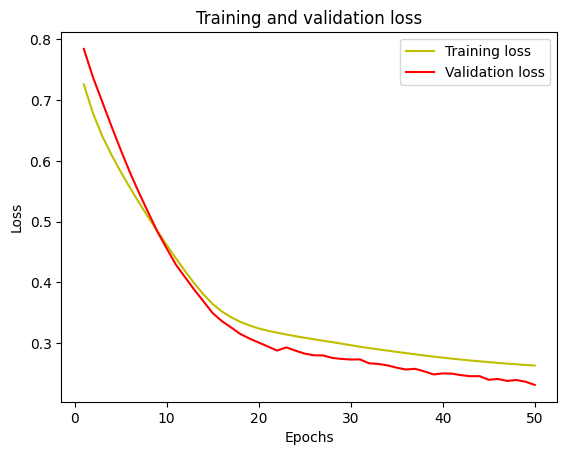

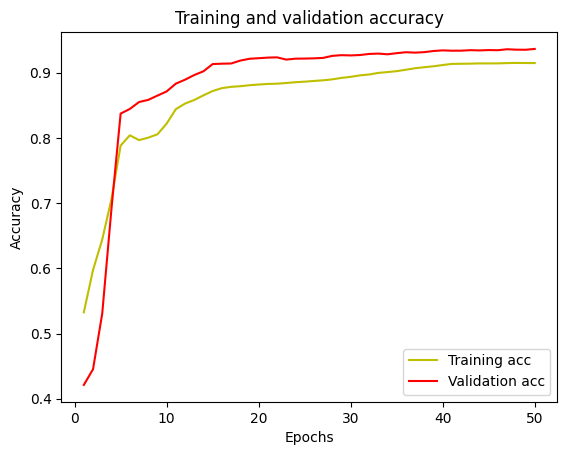

In [55]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
y_test_nn=nn_model.predict(X_flow_test)
y_test_nn

2413/2413 [==============================] - 4s 2ms/step


array([[0.91847837],
       [0.6927909 ],
       [0.93613154],
       ...,
       [0.94761646],
       [0.8200807 ],
       [0.7665584 ]], dtype=float32)

In [57]:
def binary_converter(t):
    for i in range(len(t)):
        if (abs(t[i])>=0.5):
            t[i]=1
        elif (abs(t[i])<=0.5):
            t[i]=0
    return t
y_test_nn=binary_converter(y_test_nn)
from sklearn.metrics import classification_report
y_test_nn

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [58]:
print(classification_report(y_flow_test, y_test_nn))


              precision    recall  f1-score   support

           0       0.71      0.89      0.79     10170
           1       0.98      0.94      0.96     67025

    accuracy                           0.94     77195
   macro avg       0.84      0.92      0.87     77195
weighted avg       0.95      0.94      0.94     77195



[[ 9019  1151]
 [ 3755 63270]]


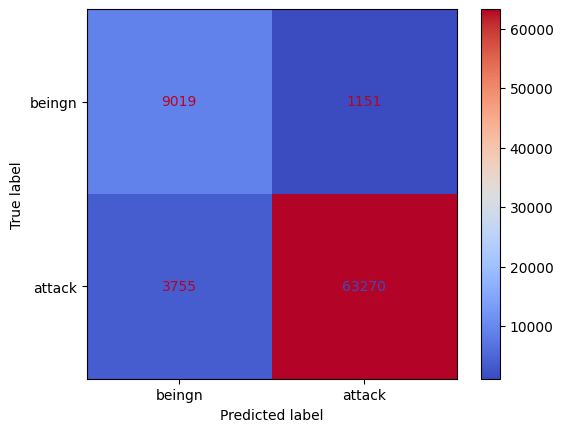

In [59]:
cm_nn=confusion_matrix(y_flow_test, y_test_nn)
print(cm_nn)
cm_disp_nn=ConfusionMatrixDisplay(confusion_matrix=cm_nn,display_labels=['beingn','attack'])
cm_disp_nn.plot(cmap='coolwarm')

In [60]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = y_test_nn.flatten().round()
predictn = predictn.tolist()
Y_testn = y_flow_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fn+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fp+=1
      
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = 
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")   


SyntaxError: '(' was never closed (1948155008.py, line 19)

In [61]:
####Plotting ROC Curve
r_probs=[0 for _ in range (len(y_flow_test))]

rf_probs=rf.predict_proba(X_flow_test)
xgb_probs=xgb_model.predict_proba(X_flow_test)
nb_probs=nb.predict_proba(X_flow_test)
knn_probs=knn.predict_proba(X_flow_test)
#nn_probs=nn_model.predict_proba(X_flow_test)


In [62]:
rf_probs=rf_probs[:,1]
xgb_probs=xgb_probs[:,1]
nb_probs=nb_probs[:,1]
knn_probs=knn_probs[:,1]

In [63]:
nn_probs=nn_model.predict(X_flow_test)

2413/2413 [==============================] - 5s 2ms/step


In [83]:
nn_list=[]
for x in nn_probs:
    nn_list.append(x[0])
nn_array=np.array(nn_list)

In [84]:
print(len(nn_array),len())

[0.91847837 0.6927909  0.93613154 ... 0.94761646 0.8200807  0.7665584 ]


In [86]:
#Calculate AUROC
rf_auc=roc_auc_score(y_flow_test,rf_probs)
xgb_auc=roc_auc_score(y_flow_test,xgb_probs)
nb_auc=roc_auc_score(y_flow_test,nb_probs)
knn_auc=roc_auc_score(y_flow_test,knn_probs)
nn_auc=roc_auc_score(y_flow_test,nn_array)

In [ ]:
print('Random Forest:AUROC=%0.3f'%(rf_auc))
print('XGBoost:AUROC=%0.3f'%(xgb_auc))
print('Naive Bayes:AUROC=%0.3f'%(nb_auc))
print('KNN :AUROC=%0.3f'%(knn_auc))

Random Forest:AUROC=0.979
XGBoost:AUROC=0.988
Naive Bayes:AUROC=0.833
KNN :AUROC=0.942


In [93]:
#Predictinf the Test Set results
rf_fpr,rf_tpr,_=roc_curve(y_flow_test,rf_probs)
xgb_fpr,xgb_tpr,_=roc_curve(y_flow_test,xgb_probs)
nb_fpr,nb_tpr,_=roc_curve(y_flow_test,nb_probs)
knn_fpr,knn_tpr,_=roc_curve(y_flow_test,knn_probs)
nn_fpr,nn_tpr,_=roc_curve(y_flow_test,nn_array)

In [95]:
def plot_roc_curve(rf_fpr,rf_tpr):
  plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC=% 0.3f)'% rf_auc)
  plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUROC=% 0.3f)'% xgb_auc)
  plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUROC=% 0.3f)'% nb_auc)
  plt.plot(knn_fpr, knn_tpr, label='KNN (AUROC=% 0.3f)'% knn_auc)
  plt.plot(nn_fpr, nn_tpr, label='NN (AUROC=% 0.3f)'% nn_auc)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characterisitcs (ROC) Curve')
  plt.legend()
  plt.show()
  
  

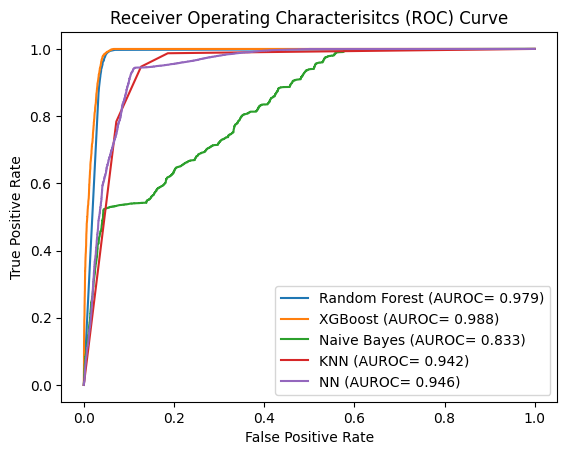

In [96]:
plot_roc_curve(rf_fpr,rf_tpr)